In [1]:
from models import MeshModel
import jax
from jax.typing import ArrayLike
from models.spots import v_spot
from models import IcosphereModel
import jax.numpy as jnp
from plots import plot_3D
from spectrum import simulate_spectrum, blackbody_intensity
from spectrum.spectrum_korg import flux
from functools import partial
from models.spots import add_spots

m = IcosphereModel.construct(1000, 1., 1., 1., jnp.concatenate([jnp.array([5000]), 0.5*jnp.ones(91)]))

I0000 00:00:1701220789.561250       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


Models defined.


In [2]:
jnp.log10(3.5)

Array(0.54406804, dtype=float32)

In [3]:
s = add_spots(mesh=m,
              thetas=jnp.array([1.]),
              phis=jnp.array([0.]),
              param_deltas=jnp.array([0.1]),
              radii=jnp.array([1.]),
              radius_factors=jnp.array([1.]),
              param_indices=jnp.array([0]))

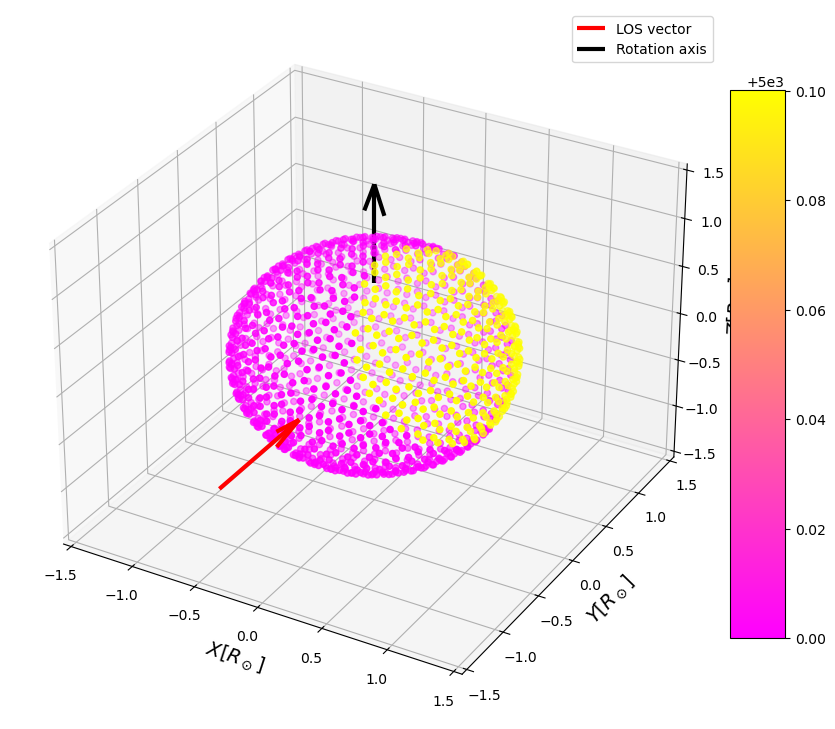

In [4]:
plot_3D(s, 0, cmap='spring');

In [5]:
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [6]:
wvs = jnp.linspace(jnp.log10(5000), jnp.log10(5500), 100)
wvs_lin = jnp.linspace(5000, 5500, 1000)
bi1 = blackbody_intensity(wvs, 0., [np.log10(3500)])
bi2 = blackbody_intensity(wvs, 0., [np.log10(3000)])

In [7]:
#si = simulate_spectrum(blackbody_intensity, s, wvs)
k_si = simulate_spectrum(flux, m, wvs)

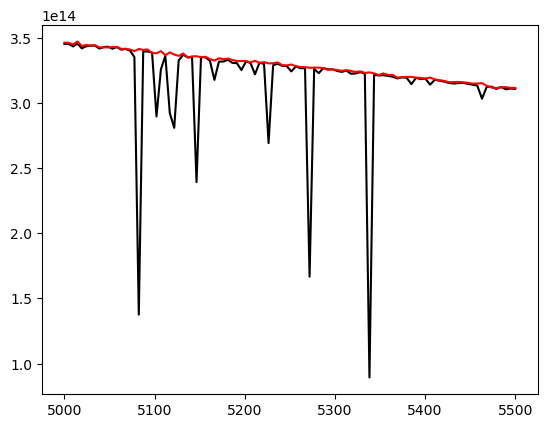

In [8]:
plt.plot(10**wvs, k_si[:, 0], color='black')
plt.plot(10**wvs, k_si[:, 1], color='red')